<a href="https://colab.research.google.com/github/yuleidner/DAV-6150/blob/main/Copy_of_M4_assn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Top'></a>
# Data Science: Module 4
## Practical Challenge: Feature Selection & Dimensionality Reduction
### Alan Leidner, Jacob Goodman, Haris Sumra 
#### Oct 10, 2021
Assignment: https://yu.instructure.com/courses/50398/assignments/191951

### Overview

The dataset was published by Mashable which is an international entertainment platform. The dataset contains various information such as how many words are in the title, how many unique words in the content, which day the article was published, title polarity.  

For this given dataset, we are going to perform exploratory data analysis (EDA), and evaluate how the features in our dataset effects the number of shares for the articles. In order to achieve that we are first going to prepare put data for model building and then construct different models. 

 Finally, we are going to choose the model that performs the best, since this model will be able to predict that number of shares an article will have. Who can utilize this model? In real world, we may have writers/authors who can make changes to their article that will maximize how many time the article will be shared or even  publishers who predict which articles will be more well-liked than the others.   

## Introduction
Why do people write articles? This question can take many forms, it could be because someone finds something valuable worth sharing with others, or maybe want to create content that will entertain others, or even generate income by publishing articles. So, there is no concrete answer to the question, but one thing we can be certain of is that when people write articles, they want the article to share to as many readers as possible. 

Which insight can we drive from share number? As we have seen on social media, the popularity of an article arises as the count for number of shares increases. Moreover, the search engine uses the number of shares as a variable to show which results to display first. Now that we know the importance of number of shares, we need to construct a model that helps us predict the number of shares. 

For our project, we are going to be working with a dataset that can we found at https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity. 

This dataset was published by mashable which is an entertainment platform.  It contains information such as how many words are in the title, how many unique words in the content, which day the article was published, and title polarity. One can utilize the information presented in the dataset to predict when the good time is to publish an article, or how many words that are in the title would be a good estimator to predict the number of shares for an article. 


Research Question:  How can we predict the number of times an online news article will be shared? To answer this question, we need to perform exploratory data analysis (EDA) on our dataset and evaluate how our variables relate to the number of shares. We will transform the data to better prepare it for predictive models, fixing any problem areas we identify in our EDA. Next we will perform feature analysis and principle component analysis to reduce our feature set to something that is accurate but without unneeded complexity. Finally, we will analyze this model and compare it to other possible models to assess its effectiveness.

## Importing Dependencies

In [1]:
#Import packages for data frames 
import numpy as np
import pandas as pd

# import pyplot and seaborn for graph creating
import matplotlib.pyplot as plt
import seaborn as sns 

# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

#load libraries to transform data
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing 
from sklearn.preprocessing import power_transform as pt 

#load libraries to perform model analysis
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
import statsmodels.api as sm

#imported to assess multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#This ingores depreciation warnings, which will make the code more readable
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Exploratory Data Analysis <a id='1'></a>
The dataset was loaded into the DAV 6150 Github Repository here: https://raw.githubusercontent.com/yuleidner/DAV-6150/main/M4/M4_Data.csv. This notebook will now load the csv into a Pandas dataframe for analysis.

In [2]:
# read a set of sample data from github. It contains information related to cars and insurance
filename = "https://raw.githubusercontent.com/yuleidner/DAV-6150/main/M4/M4_Data.csv"
df = pd.read_csv(filename)
pd.set_option('display.max_columns', None) #expands df to display all columns
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### Attribute Information


Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?  

**kw and self_reference** <- the following columns are explained in the original [paper](https://core.ac.uk/download/pdf/55638607.pdf)
>Some of the features are dependent of particularities of the Mashable
service: articles often reference other articles published in the same service; and
articles have meta-data, such as keywords, data channel type and total number
of shares (when considering Facebook, Twitter, Google+, LinkedIn, StumbleUpon and Pinterest). Thus, we extracted the minimum, average and maximum
number of shares (known before publication) of all Mashable links cited in the
article. Similarly, we rank all article keyword average shares (known before publication), in order to get the worst, average and best keywords. For each of these
keywords, we extract the minimum, average and maximum number of shares.    
\- <cite>K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News.</cite>

19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable

**weekday** dummy variables describing the day of the week the article was published 
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?


**weekend** indicator varible for whether article was published on a weekend 
38. is_weekend: Was the article published on the weekend?

**LDA** attributes explained in source [paper](https://core.ac.uk/download/pdf/55638607.pdf)
>The Latent
Dirichlet Allocation (LDA) algorithm was applied to all Mashable texts
(known before publication) in order to first identify the five top relevant topics and then measure the closeness of current article to such topics  
\- <cite>K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News.</cite>

39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4

**Subjectivity and Polarity** attributes explained in source [paper](https://core.ac.uk/download/pdf/55638607.pdf)
>To compute the subjectivity and polarity sentiment analysis, we adopted the Pattern web mining module (http://www.clips.ua.ac.be/pattern) [Tom De Smedt, Lucas Nijs, and Walter Daelemans. Creative web services with
pattern. In Proceedings of the Fifth International Conference on Computational
Creativity, 2014.], allowing the computation of sentiment polarity and subjectivity scores.  
\- <cite>K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News.</cite>

44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level

**shares** The number of times an article has been shared. this is our Target or what we are trying to predict for new articles.
60. shares: Number of shares (target)

In [3]:
## a few methods will now be called to view summaries of this dataframe
df.shape

(39644, 61)

We have a decent size data, that contains 61 columns and 39644 rows

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

There are no missing values, and aside from the URL, all features are numerical.

In [5]:
#sanity check to verify that there are certainly no null values
df.isnull().sum().sum()

0

In [6]:
#We are going to look at the statistical analysis of our data
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

### Univariate Analysis
Column by Column EDA





We note that there is a blank space before the name of our response variable. We will remove it, and any other spaces now to prevent formating problems while calling functions.

In [7]:
df.columns = df.columns.str.replace(' ', '')

#### Shares (response variable)
Response Variable (indicates # of times an article is shared)


Skewness: 33.963885
Kurtosis: 1832.672657


count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

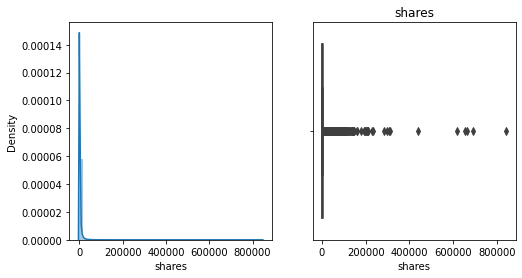

In [8]:
#Create a histogram and boxplot side by side
i = df['shares']

sns.set_style();
##plt.hist(i, density=True, stacked =True)
plt.figure(figsize=(8,4))#sets size of plot
#Histogram
plt.subplot(1,2,1);#sets subplot location left
sns.distplot(i);#calls a histogram
#plt.title('shares')#adds title
#Boxplot
plt.subplot(1,2,2);#sets subplot location right
sns.boxplot(i);#calls a boxplot
plt.title('shares');#adds title

print("Skewness: %f" %i.skew()) #Adds Skew (symetry)value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread
i.describe() #Adds summary statistics of the variable

There are some extreme outliers here. Let's examine them now.

In [9]:
# find all  rows that have share values whose values are > 3 standard deviations from the mean of data in that column
share_outliers = df[np.abs(df['shares'] - df['shares'].mean() ) > (3 * df['shares'].std() )]
share_outliers.shape

(308, 61)

In [10]:
share_outliers.shares.describe()

count       308.000000
mean      85127.915584
std       93292.083499
min       38400.000000
25%       47100.000000
50%       57150.000000
75%       87150.000000
max      843300.000000
Name: shares, dtype: float64

While these are clear outliers from the media 1400 shares, they are  datapoints that we will not remove. It is likely that persons analyzing this dataset would want to find the values that achieved these unusually positive results.

#### url column
This column is the link to the website being shared in the dataset. It acts as natural index, but is not a predictor in our model as indicated by the attribute information. We can check to see if there are any duplicates though.

In [11]:
df['url'].duplicated().sum()

0

There are no duplicates for us to worry about. We will drop this feature from our model.

#### timedelta column

Skewness: 0.120504


count    39644.000000
mean       354.530471
std        214.163767
min          8.000000
25%        164.000000
50%        339.000000
75%        542.000000
max        731.000000
Name: timedelta, dtype: float64

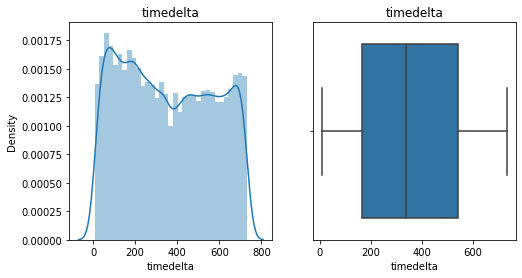

In [12]:
#Create a histogram and boxplot side by side for timedelta
j= 1
i= df.iloc[:,j]

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title(df.columns[j]);
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This variable seems relatively well distributed, if bi-model. However, the data attribute information explicitly states that they do not consider the time differential between page publication, and the collection of the study metrics to be predictive. We will drop this feature from our dataset.

#### n_tokens_title

Skewness: 0.165320


count    39644.000000
mean        10.398749
std          2.114037
min          2.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         23.000000
Name: n_tokens_title, dtype: float64

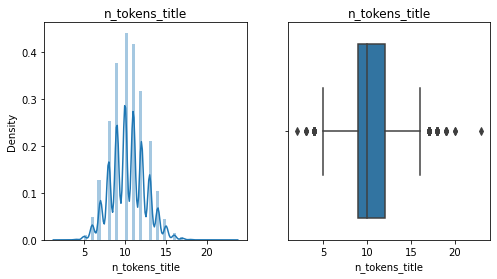

In [13]:
#Create a histogram and boxplot side by side for n_tokens_title
j= 2
i= df.iloc[:,j]

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title(df.columns[j]);
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature is the number of words in the article title. It seems well distributed, and normal. No further data manipulation needed.

#### n_tokens_content

Skewness: 2.945422


count    39644.000000
mean       546.514731
std        471.107508
min          0.000000
25%        246.000000
50%        409.000000
75%        716.000000
max       8474.000000
Name: n_tokens_content, dtype: float64

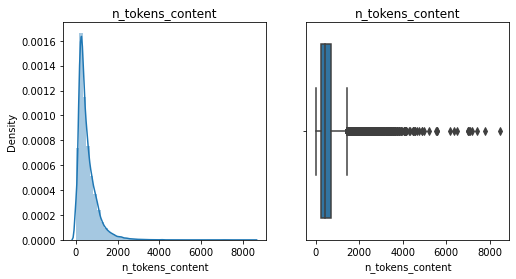

In [14]:
#Create a histogram and boxplot side by side for n_tokens_content
j= 3
i= df.iloc[:,j]

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title(df.columns[j]);
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Number of words in the article content. This has a number of outliers, skewing right.

It is also weird that some articles have no words, though they may just contain a picture or video. We know from above that they at least have titles.

We will standardize these values.

#### n_unique_tokens

Skewness: 198.655116


count    39644.000000
mean         0.548216
std          3.520708
min          0.000000
25%          0.470870
50%          0.539226
75%          0.608696
max        701.000000
Name: n_unique_tokens, dtype: float64

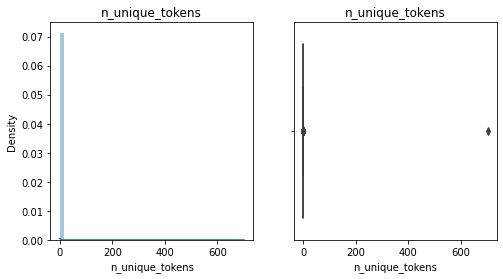

In [15]:
#Create a histogram and boxplot side by side for n_unique_tokens
j= 4
i= df.iloc[:,j]

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title(df.columns[j]);
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This is the rate of unique words in the content. This has extreme outliers, which we will look at now.

In [16]:
# find all  rows that have share values whose values are > 3 standard deviations from the mean of data in that column
n_unique_tokens_outliers = df[np.abs(df['n_unique_tokens'] - df['n_unique_tokens'].mean() ) > (3 * df['n_unique_tokens'].std() )]
n_unique_tokens_outliers.shape

(1, 61)

This has 1 extreme outlier, which we will examine.

In [17]:
print(df[df.n_unique_tokens == df.n_unique_tokens.max()])

                                                     url  timedelta  \
31037  http://mashable.com/2014/08/18/ukraine-civilia...      142.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
31037             9.0            1570.0            701.0            1042.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
31037                     650.0       11.0            10.0      51.0   

       num_videos  average_token_length  num_keywords  \
31037         0.0              4.696178           7.0   

       data_channel_is_lifestyle  data_channel_is_entertainment  \
31037                        0.0                            1.0   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
31037                  0.0                     0.0                   0.0   

       data_channel_is_world  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  \
31037                    0.0        -1.0       778.0  143.714286     231

From the url field, and the total word count doubling the unique word count, we suppose that this article either is a list of foriegn words, or may include a foreign translation. Either way, we believe this feature can have a significantly higher chance of being predictive in our model if we drop this row during our data preperation step.

#### n_non_stop_words

Skewness: 198.792445


count    39644.000000
mean         0.996469
std          5.231231
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name: n_non_stop_words, dtype: float64

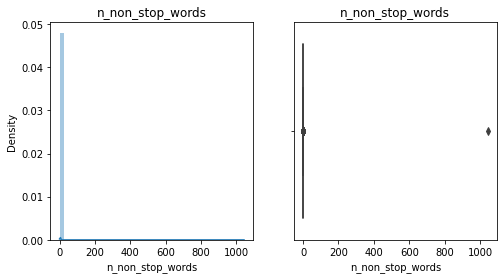

In [18]:
#Create a histogram and boxplot side by side for n_non_stop_words
j= 5
i= df.iloc[:,j]

plt.figure(figsize=(8,4))
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title(df.columns[j]);
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Stop words are "the words which are generally filtered out before processing a natural language are called stop words. These are actually the most common words in any language"*

Non-stop words would then be unique words. This feature seems to suffer from the same problem as n_unique_tokens, which makes sense. Let's check to make sure.

*https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a

In [19]:
# find all  rows that have share values whose values are > 3 standard deviations from the mean of data in that column
n_non_stop_words_outliers = df[np.abs(df['n_non_stop_words'] - df['n_non_stop_words'].mean() ) > (3 * df['n_non_stop_words'].std() )]
n_non_stop_words_outliers.shape

(1, 61)

In [20]:
print(df[df.n_non_stop_words == df.n_non_stop_words.max()])

                                                     url  timedelta  \
31037  http://mashable.com/2014/08/18/ukraine-civilia...      142.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
31037             9.0            1570.0            701.0            1042.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
31037                     650.0       11.0            10.0      51.0   

       num_videos  average_token_length  num_keywords  \
31037         0.0              4.696178           7.0   

       data_channel_is_lifestyle  data_channel_is_entertainment  \
31037                        0.0                            1.0   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
31037                  0.0                     0.0                   0.0   

       data_channel_is_world  kw_min_min  kw_max_min  kw_avg_min  kw_min_max  \
31037                    0.0        -1.0       778.0  143.714286     231

The same article from above is impacting the number of non stop words, which we would expect from "unique" words. Our intention to drop this row is re-inforced.

#### n_non_stop_unique_tokens

Skewness: 198.443294


count    39644.000000
mean         0.689175
std          3.264816
min          0.000000
25%          0.625739
50%          0.690476
75%          0.754630
max        650.000000
Name: n_non_stop_unique_tokens, dtype: float64

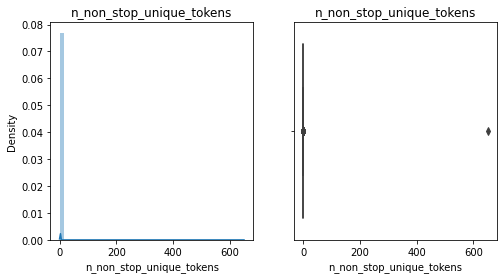

In [21]:
#Create a histogram and boxplot side by side for n_non_stop_unique_tokens
j= 6
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Rate of unique non-stop words in the content. This suffers from the same outlier row.

#### num_hrefs

Skewness: 4.013495


count    39644.000000
mean        10.883690
std         11.332017
min          0.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        304.000000
Name: num_hrefs, dtype: float64

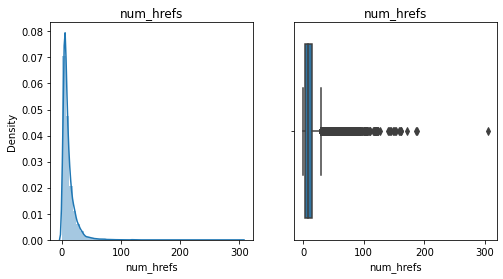

In [22]:
#Create a histogram and boxplot side by side for num_hrefs
j= 7
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Number of links in the article. This will be normalized and standardized.

In [23]:
# find all  rows that have share values whose values are > 3 standard deviations from the mean of data in that column
num_hrefs_outliers = df[np.abs(i - i.mean() ) > (3 * i.std() )]
num_hrefs_outliers.shape

(731, 61)

There are 871 outliers in the rightskewed model. This will benefit from normalization, and possibly standardization.

#### num_self_hrefs

Skewness: 5.172751


count    39644.000000
mean         3.293638
std          3.855141
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max        116.000000
Name: num_self_hrefs, dtype: float64

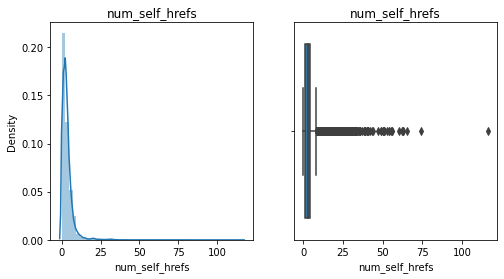

In [24]:
#Create a histogram and boxplot side by side for num_self_hrefs
j= 8
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Number of links to other articles published by Mashable. I would expect these to be counted in the num_hrefs feature as well.

This feature is skewed and should be normalized and possibly standardized.

#### num_imgs

Skewness: 3.946596


count    39644.000000
mean         4.544143
std          8.309434
min          0.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        128.000000
Name: num_imgs, dtype: float64

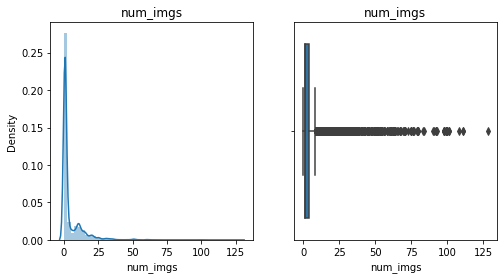

In [25]:
#Create a histogram and boxplot side by side for num_imgs
j= 9
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This features is the number of images in an article. It is right skewed. It should be normalized and standardized.

#### num_videos

Skewness: 7.019533


count    39644.000000
mean         1.249874
std          4.107855
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: num_videos, dtype: float64

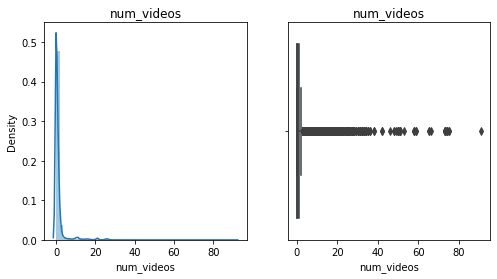

In [26]:
#Create a histogram and boxplot side by side for num_videos
j= 10
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This features is the number of videos in an article. It is right skewed. It should be normalized and standardized.

#### average_token_length

Skewness: -4.576012


count    39644.000000
mean         4.548239
std          0.844406
min          0.000000
25%          4.478404
50%          4.664082
75%          4.854839
max          8.041534
Name: average_token_length, dtype: float64

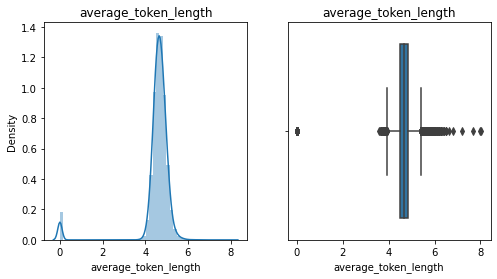

In [27]:
#Create a histogram and boxplot side by side for average_token_length
j= 11
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature is the average length of the words in the content. The zero values are concerning here, though there are articles that have no words.

In [28]:
# find all  rows that have share values whose values are > 3 standard deviations from the mean of data in that column
zero_avg_token = df.loc[df['average_token_length'] == 0]
print(zero_avg_token.shape)
zero_avg_token.head()

(1181, 61)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
893,http://mashable.com/2013/01/23/actual-facebook...,715.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,217.0,1200.0,542.500000,0.0,51900.0,16928.571429,0.0,3647.272727,1923.430603,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.191383,0.028703,0.179282,0.572047,0.028586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.550000,-0.500000,0.050000,0.500000,2500
917,http://mashable.com/2013/01/23/fitness-gadget-...,715.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,217.0,2000.0,582.285714,0.0,51900.0,16080.000000,0.0,2939.239130,1596.149445,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.020362,0.133522,0.020019,0.020554,0.805543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1700
1062,http://mashable.com/2013/01/25/data-vs-nature-...,713.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2500.0,669.000000,0.0,51900.0,17255.555556,0.0,4380.000000,2328.023284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.532843,0.022387,0.260606,0.023187,0.160977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,4500
1121,http://mashable.com/2013/01/26/infographics-ma...,712.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,217.0,1700.0,611.000000,0.0,51900.0,13628.571429,0.0,4408.000000,2332.097082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.885229,0.028718,0.028587,0.028866,0.028599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.033333,0.433333,0.033333,6800
1312,http://mashable.com/2013/01/29/social-tv-chart...,709.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,217.0,1700.0,517.800000,440.0,51900.0,17628.000000,440.0,4423.333333,2305.412167,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020977,0.020356,0.020075,0.918569,0.020023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283333,0.266667,0.216667,0.266667,1000


The number of articles with a zero avg token is concerning, though at least some of them have other content. It does not need to be standardized or normalized.

#### num_keywords

Skewness: -0.147251


count    39644.000000
mean         7.223767
std          1.909130
min          1.000000
25%          6.000000
50%          7.000000
75%          9.000000
max         10.000000
Name: num_keywords, dtype: float64

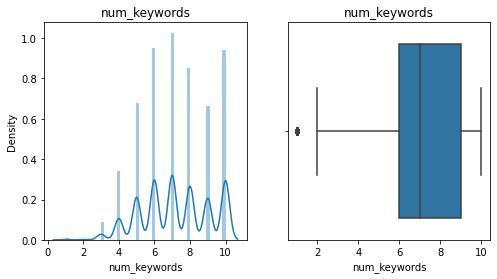

In [29]:
#Create a histogram and boxplot side by side for num_keywords
j= 12
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature measures the number of keywords in the metadata of an article. These act as tags for the article. The distribution here is relatively normal. It seems there are a few articles that have no keywords, but that isn't very concerning.

#### Data channel
We will explore doing EDA on data channel as if it was not already dummied.

count     39644
unique        6
top       world
freq       8427
dtype: object

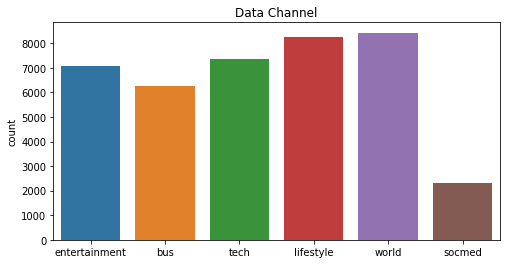

In [30]:
j= 13 # starting column
h= 19 # ending column 
#assigning columns to a new variable
i= df.iloc[:,j:h]
# creating sum column to check for multiple values
i['sum'] = i.sum(axis=1)
# no mulitple values found droping columning and merging values to one column 
i.drop(columns='sum')
dedummied = i.idxmax(axis=1)

#parsing out category
dedummied = dedummied.str.split('_').apply(lambda x : x[-1])


plt.figure(figsize=(8,4))
#plt.subplot(1,2,1);#Histogram location
plt.title('Data Channel');
sns.countplot(dedummied);
#plt.subplot(1,2,2);#Boxplot location
#sns.boxplot();
#plt.title(df.columns[j]);
#print("Skewness: %f" %dedummied.skew()) #Adds Skew value
#print(i.describe()) #Adds summary statistics of the variable
dedummied.describe()



The Categorical dummy columns represented here: 
* data_channel_is_lifestyle: Is data channel 'Lifestyle'?
* data_channel_is_entertainment: Is data channel 'Entertainment'?
* data_channel_is_bus: Is data channel 'Business'?
* data_channel_is_socmed: Is data channel 'Social Media'?
* data_channel_is_tech: Is data channel 'Tech'?
* data_channel_is_world: Is data channel 'World'?

Every article is categorized into one of these channels. If we had more time we would ensure that 'socmed' articles were evenly represented in the testing and validating subsets of our models, though we aren't overly worried about that at this time.

#### kw_min_min

Skewness: 2.374947


count    39644.000000
mean        26.106801
std         69.633215
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          4.000000
max        377.000000
Name: kw_min_min, dtype: float64

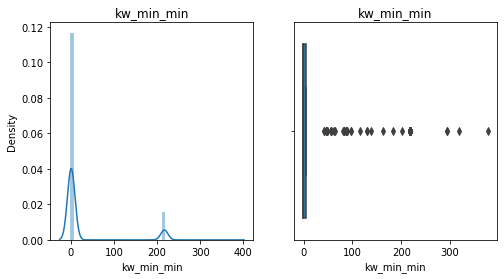

In [31]:
#Create a histogram and boxplot side by side for kw_min_min
j= 19
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

It isn't clear what this feature represents;  we believe that this finds the keywords on the article, sums the total number of shares for each article tagged with that keyword, and then selects the keyword with the lowest total sum. The feature then displays the lowest recorded share count for any article with that keyword. The majority of the values are -1 though, and it isn't clear what that would represent here. Nevertheless, the distribution is skewed  to the right and would benefit from standardization and normalization.

#### kw_max_min

Skewness: 35.328434


count     39644.000000
mean       1153.951682
std        3857.990877
min           0.000000
25%         445.000000
50%         660.000000
75%        1000.000000
max      298400.000000
Name: kw_max_min, dtype: float64

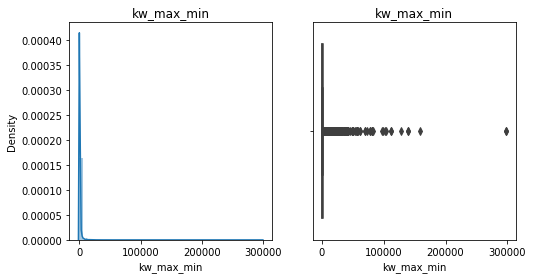

In [32]:
#Create a histogram and boxplot side by side for kw_max_min
j= 20
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature seems to measure the greatest number of shares of articles sharing the worst performing keyword on the article in question. It would benefit from normalization and standardization.

#### kw_avg_min

Skewness: 31.306108


count    39644.000000
mean       312.366967
std        620.783887
min         -1.000000
25%        141.750000
50%        235.500000
75%        357.000000
max      42827.857143
Name: kw_avg_min, dtype: float64

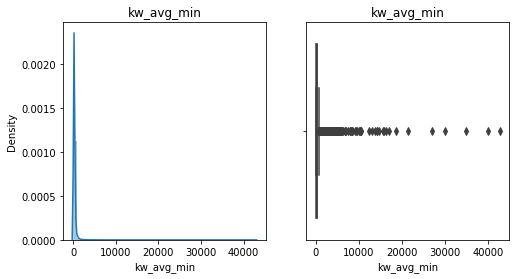

In [33]:
#Create a histogram and boxplot side by side for kw_avg_min
j= 21
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature seems to be a measure of the average number of shares of articles sharing the worst performing keyword to the article in question. It isn't clear what the -1 here represents either. The feature would benefit from normalization and standardization. 

#### kw_min_max

Skewness: 10.386372


count     39644.000000
mean      13612.354102
std       57986.029357
min           0.000000
25%           0.000000
50%        1400.000000
75%        7900.000000
max      843300.000000
Name: kw_min_max, dtype: float64

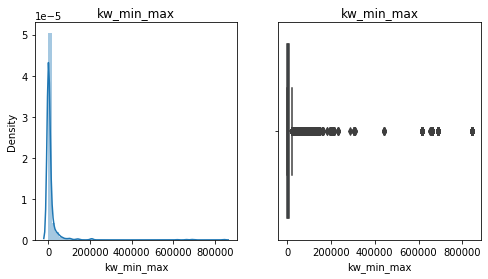

In [34]:
#Create a histogram and boxplot side by side for kw_min_max
j= 22
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature seems to be a measure of the lowest number of shares of articles sharing the best performing keyword on the article in question. It would benefit from normalization and standardization.

#### kw_max_max

Skewness: -2.644982


count     39644.000000
mean     752324.066694
std      214502.129573
min           0.000000
25%      843300.000000
50%      843300.000000
75%      843300.000000
max      843300.000000
Name: kw_max_max, dtype: float64

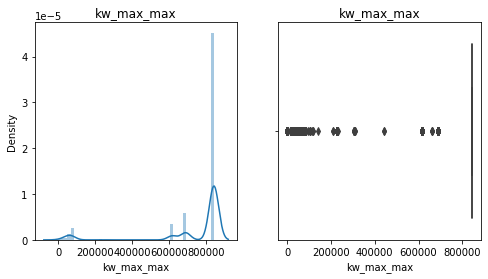

In [35]:
#Create a histogram and boxplot side by side for kw_max_max
j= 23
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature seems to be a measure of the highest number of shares of articles sharing the best performing keyword on the article in question. It would benefit from normalization and standardization.

#### kw_avg_max

Skewness: 0.624310


count     39644.000000
mean     259281.938083
std      135102.247285
min           0.000000
25%      172846.875000
50%      244572.222223
75%      330980.000000
max      843300.000000
Name: kw_avg_max, dtype: float64

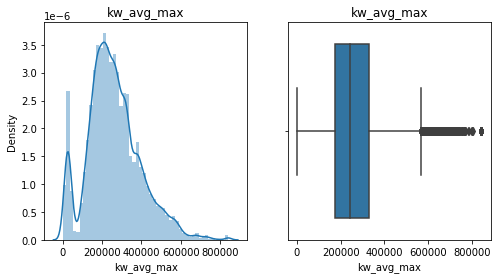

In [36]:
#Create a histogram and boxplot side by side for kw_avg_max
j= 24
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature seems to be a measure of the average number of shares of articles sharing the best performing keyword on the article in question. It would benefit from standardization.

#### kw_min_avg

Skewness: 0.467976


count    39644.000000
mean      1117.146610
std       1137.456951
min         -1.000000
25%          0.000000
50%       1023.635611
75%       2056.781032
max       3613.039820
Name: kw_min_avg, dtype: float64

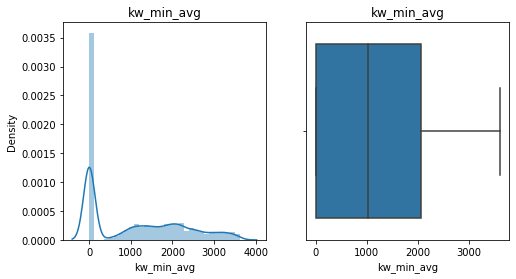

In [37]:
#Create a histogram and boxplot side by side for kw_min_avg
j= 25
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature seems to be a measure of the minimum number of shares of articles sharing the most average performing keyword on the article in question. It is unclear what an "average" keyword would mean in this context. We will normalize it to keep it in line with the other keyword metrics.

#### kw_max_avg

Skewness: 16.411670


count     39644.000000
mean       5657.211151
std        6098.871957
min           0.000000
25%        3562.101631
50%        4355.688836
75%        6019.953968
max      298400.000000
Name: kw_max_avg, dtype: float64

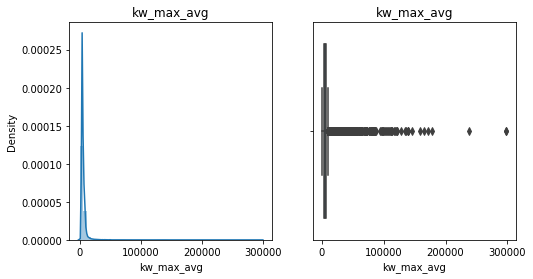

In [38]:
#Create a histogram and boxplot side by side for kw_max_avg
j= 26
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature seems to be a measure of the greatest number of shares of articles sharing the most average performing keyword on the article in question. It would benefit from normalization and standardization.

#### kw_avg_avg

Skewness: 5.760177


count    39644.000000
mean      3135.858639
std       1318.150397
min          0.000000
25%       2382.448566
50%       2870.074878
75%       3600.229564
max      43567.659946
Name: kw_avg_avg, dtype: float64

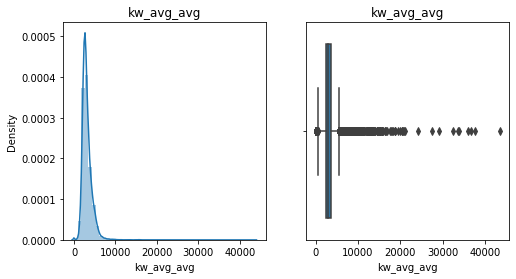

In [39]:
#Create a histogram and boxplot side by side for kw_avg_avg
j= j+1#at this point we switch from calling the columns by splice explicitly, and iterate over the slice in every cell
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This feature seems to be a measure of the average number of shares of articles sharing the most average performing keyword on the article in question. We will normalize and standardize this feature.

#### self_reference_min_shares

Skewness: 26.264364


count     39644.000000
mean       3998.755396
std       19738.670516
min           0.000000
25%         639.000000
50%        1200.000000
75%        2600.000000
max      843300.000000
Name: self_reference_min_shares, dtype: float64

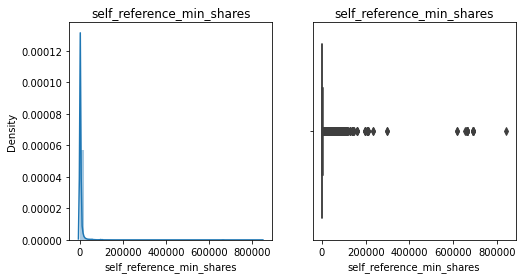

In [40]:
#Create a histogram and boxplot side by side for self_reference_min_shares
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Min. shares of referenced articles in Mashable. In other words; if the article references other Mashable articles, what is the number of shares of the least shared referenced article. The feature should be normalized and standardized.

#### self_reference_max_shares

Skewness: 13.870849


count     39644.000000
mean      10329.212662
std       41027.576613
min           0.000000
25%        1100.000000
50%        2800.000000
75%        8000.000000
max      843300.000000
Name: self_reference_max_shares, dtype: float64

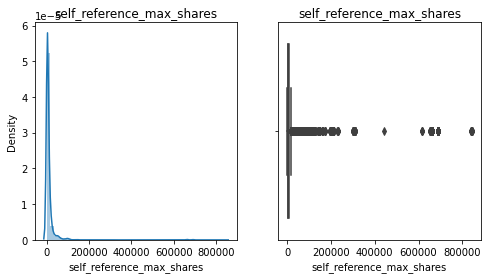

In [41]:
#Create a histogram and boxplot side by side for self_reference_max_shares

j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

The maximum shares of referenced articles in Mashable; ie if the article references other Mashable articles, what is the number of shares of the most shared referenced article. It should be normalized and standardized.

#### self_reference_avg_sharess

Skewness: 17.914093


count     39644.000000
mean       6401.697580
std       24211.332231
min           0.000000
25%         981.187500
50%        2200.000000
75%        5200.000000
max      843300.000000
Name: self_reference_avg_sharess, dtype: float64

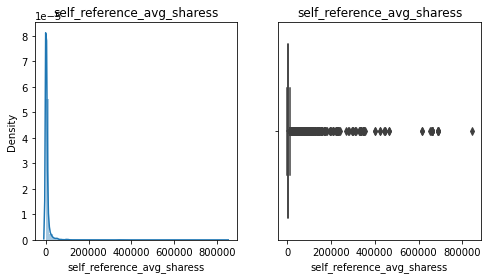

In [42]:
#Create a histogram and boxplot side by side for self_reference_avg_shares
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Average shares of referenced articles in Mashable; ie if the article references other Mashable articles, what is theaverage number of shares of the referenced articles. It should be normalized and standardized. It has an "extra" s at the end of the column name. We aren't sure if this is a mistake, and will not fix the name.

#### days of the week 
 

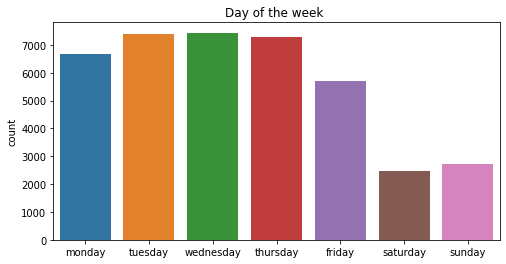

In [43]:
j= 31 # choosing monday as starting column
h= 38 # choosing is_weekend asending column 

i= df.iloc[:,j:h]#assigning columns to a new variable

i['sum'] = i.sum(axis=1)# creating sum column to check for multiple values

i.drop(columns='sum')# no mulitple values found. droping columning and merging values to one column 
dedummied = i.idxmax(axis=1)

dedummied = dedummied.str.split('_').apply(lambda x : x[-1])#parsing out category


plt.figure(figsize=(8,4))
plt.title('Day of the week ');
sns.countplot(dedummied);

The Categorical dummy columns represented here: 
31.  weekday_is_monday: Was the article published on a Monday?
32.  weekday_is_tuesday: Was the article published on a Tuesday?
33.  weekday_is_wednesday: Was the article published on a Wednesday?
34.  weekday_is_thursday: Was the article published on a Thursday?
35.  weekday_is_friday: Was the article published on a Friday?
36.  weekday_is_saturday: Was the article published on a Saturday?
37.  weekday_is_sunday: Was the article published on a Sunday?

We can see a significant drop of articles being posted on weekends. If it wasn't already created in the next column we would recommend thecreation of an indicator variable.

#### is_weekend

Skewness: 2.188500


count    39644.000000
mean         0.130915
std          0.337312
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_weekend, dtype: float64

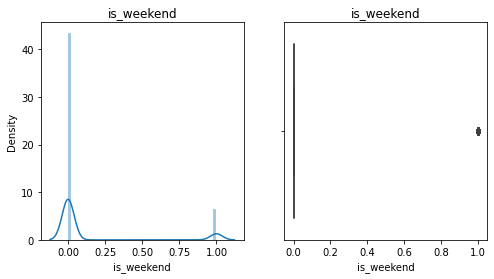

In [44]:
#Create a histogram and boxplot side by side for is_weekend
j= 38
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This doesn't give us any information that we didn't have already. we would expect this feature to be dropped, or to drop each individual day feature.

#### LDA_00

Skewness: 1.567463


count    39644.000000
mean         0.184599
std          0.262975
min          0.000000
25%          0.025051
50%          0.033387
75%          0.240958
max          0.926994
Name: LDA_00, dtype: float64

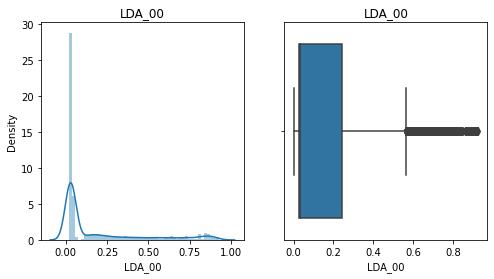

In [45]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

As described in the attribute information section, this feature is a score of closeness to a caluclated measure. We arent exactly clear on what this is, but know how to analyze it regardless. This score is standardized, but not normalized.

#### LDA_01

Skewness: 2.086722


count    39644.000000
mean         0.141256
std          0.219707
min          0.000000
25%          0.025012
50%          0.033345
75%          0.150831
max          0.925947
Name: LDA_01, dtype: float64

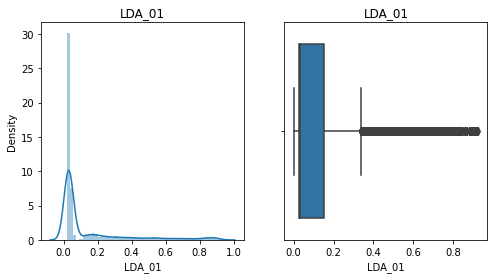

In [46]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This score is standardized, but not normalized.

#### LDA_02

Skewness: 1.311695


count    39644.000000
mean         0.216321
std          0.282145
min          0.000000
25%          0.028571
50%          0.040004
75%          0.334218
max          0.919999
Name: LDA_02, dtype: float64

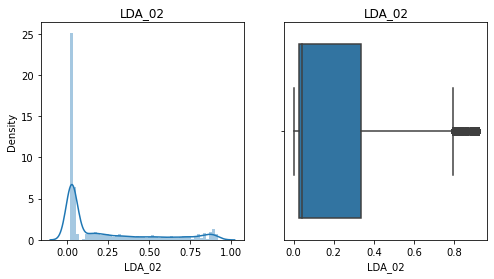

In [47]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This score is standardized, but not normalized.

#### LDA_03

Skewness: 1.238716


count    39644.000000
mean         0.223770
std          0.295191
min          0.000000
25%          0.028571
50%          0.040001
75%          0.375763
max          0.926534
Name: LDA_03, dtype: float64

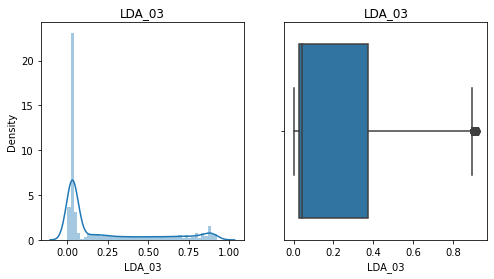

In [48]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This score is standardized, but not normalized.

#### LDA_04

Skewness: 1.173129


count    39644.000000
mean         0.234029
std          0.289183
min          0.000000
25%          0.028574
50%          0.040727
75%          0.399986
max          0.927191
Name: LDA_04, dtype: float64

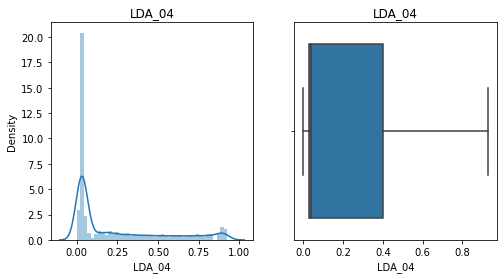

In [49]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This score is standardized, but not normalized.

#### global_subjectivity

Skewness: -1.372689


count    39644.000000
mean         0.443370
std          0.116685
min          0.000000
25%          0.396167
50%          0.453457
75%          0.508333
max          1.000000
Name: global_subjectivity, dtype: float64

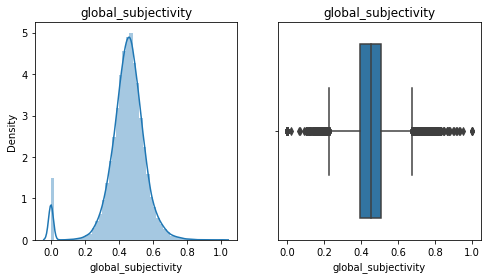

In [50]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This column scores an article how subjective (vs objective) an article is. This seems normally distributed, with a small spike of zero values, which would represent fully "factual" articles. We do not believe that data preperation is needed.

#### global_sentiment_polarity

Skewness: 0.105457


count    39644.000000
mean         0.119309
std          0.096931
min         -0.393750
25%          0.057757
50%          0.119117
75%          0.177832
max          0.727841
Name: global_sentiment_polarity, dtype: float64

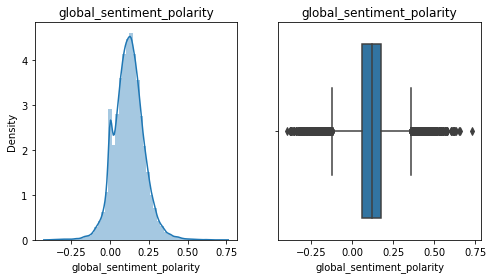

In [51]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This variable is an analysis of "public opinion" as calculated from extracted and weighted text. It seems gaussian, and we expect a high polarity to be strongly predictive of the number of shares. However, I might expect a more controvertial variable to be shared even more (think flame wars). If there is no variable that directly measures this controvertial score, we will create one if time allows.

#### global_rate_positive_words

Skewness: 0.323047


count    39644.000000
mean         0.039625
std          0.017429
min          0.000000
25%          0.028384
50%          0.039023
75%          0.050279
max          0.155488
Name: global_rate_positive_words, dtype: float64

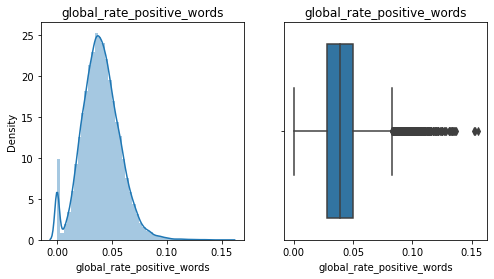

In [52]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Global rate positive words columns gives us the rate of positive words in the content. The distribution seems equal however there is a spike at 0. We do not believe data preperation is needed.

#### global_rate_negative_words

Skewness: 1.491917


count    39644.000000
mean         0.016612
std          0.010828
min          0.000000
25%          0.009615
50%          0.015337
75%          0.021739
max          0.184932
Name: global_rate_negative_words, dtype: float64

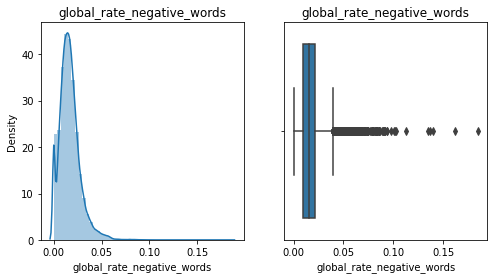

In [53]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Global rate negative words gives us the rate of negative words that are in the content. It seems that most of our values distributed closer to zero, hence why our mean value is low. It may very well linked with some articles that have unique content like graphs or videos without any words. We do not believe any data preparation is needed.

#### rate_positive_words

Skewness: -1.423106


count    39644.000000
mean         0.682150
std          0.190206
min          0.000000
25%          0.600000
50%          0.710526
75%          0.800000
max          1.000000
Name: rate_positive_words, dtype: float64

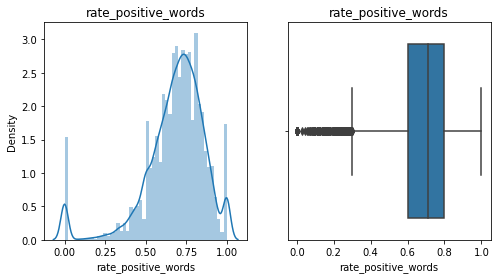

In [54]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Rate positive words are simply words among non-neutral token. We can state that the values here are normally distributed and gaussian.

#### rate_negative_words

Skewness: 0.407241


count    39644.000000
mean         0.287934
std          0.156156
min          0.000000
25%          0.185185
50%          0.280000
75%          0.384615
max          1.000000
Name: rate_negative_words, dtype: float64

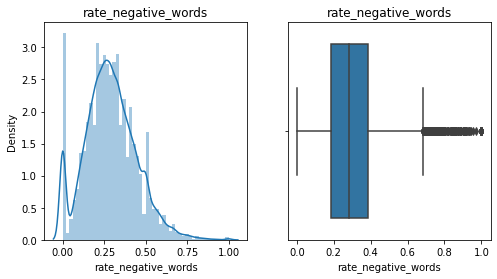

In [55]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Rate Negative words are negative words amoung non-neutral tokens, and they seems to have equal distribution. There is a spike at zero which may be linked to articles that have unique content such as images or videos and don't contain many words. We do not believe data preparation is needed.

#### avg_positive_polarity

Skewness: -0.724795


count    39644.000000
mean         0.353825
std          0.104542
min          0.000000
25%          0.306244
50%          0.358755
75%          0.411428
max          1.000000
Name: avg_positive_polarity, dtype: float64

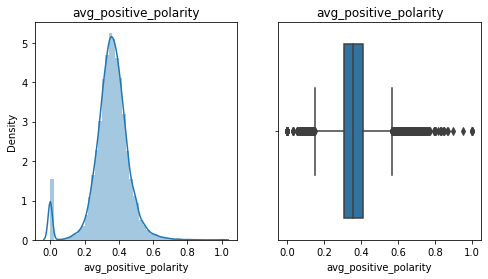

In [56]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Again there is a small spike at zero, and it is evenly distributed values. That spike at zero could be because the content contains videos. No data preparation needed.

#### min_positive_polarity

Skewness: 3.040468


count    39644.000000
mean         0.095446
std          0.071315
min          0.000000
25%          0.050000
50%          0.100000
75%          0.100000
max          1.000000
Name: min_positive_polarity, dtype: float64

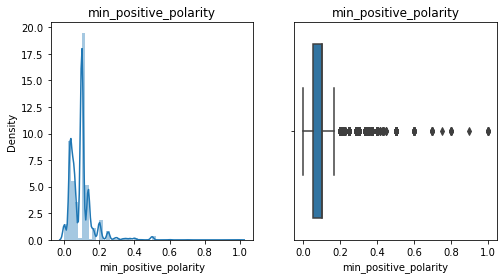

In [57]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This columns contains the minimum polarity of positive words, values are within 0 and 1 range, with most of the words near mean value. No data preparation needed.

#### max_positive_polarity

Skewness: -0.939756


count    39644.000000
mean         0.756728
std          0.247786
min          0.000000
25%          0.600000
50%          0.800000
75%          1.000000
max          1.000000
Name: max_positive_polarity, dtype: float64

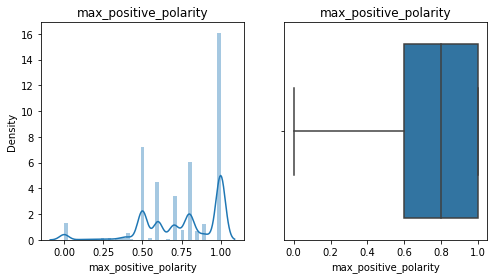

In [58]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This column contains maximum polarity of positive words, the values are within 0 and 1 range. We do not believe data prepartion is needed.

#### avg_negative_polarity

Skewness: -0.551644


count    39644.000000
mean        -0.259524
std          0.127726
min         -1.000000
25%         -0.328383
50%         -0.253333
75%         -0.186905
max          0.000000
Name: avg_negative_polarity, dtype: float64

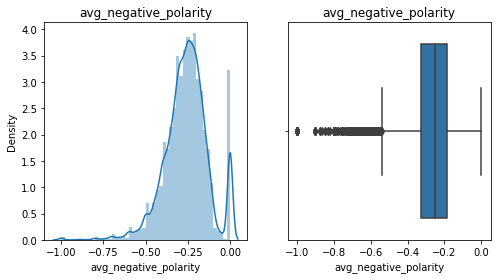

In [59]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This column contains average polarity of negative words. The values are lower than 0 so we can state that this represent negative sentiment. No data prepartion is needed.

#### min_negative_polarity

Skewness: -0.073155


count    39644.000000
mean        -0.521944
std          0.290290
min         -1.000000
25%         -0.700000
50%         -0.500000
75%         -0.300000
max          0.000000
Name: min_negative_polarity, dtype: float64

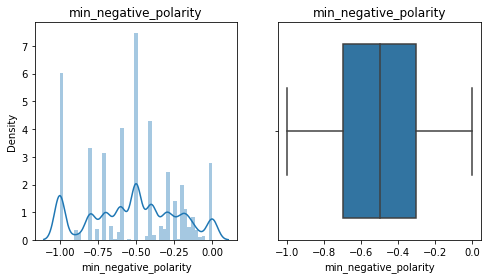

In [60]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This variable also have values that range from -1 to 0. The mean value is at .52, however there are fewer spikes at different values. We can state that values are relatively uniform. 

#### max_negative_polarity

Skewness: -3.459747


count    39644.000000
mean        -0.107500
std          0.095373
min         -1.000000
25%         -0.125000
50%         -0.100000
75%         -0.050000
max          0.000000
Name: max_negative_polarity, dtype: float64

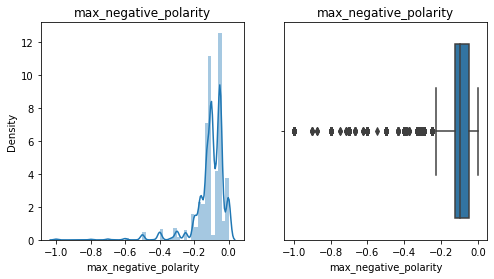

In [61]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This column represents the maximum polarity of negative words, like others we just discussed this also have values ranging between 0 and 1. We do not believe any data preparation is needed.

#### title_subjectivity

Skewness: 0.816085


count    39644.000000
mean         0.282353
std          0.324247
min          0.000000
25%          0.000000
50%          0.150000
75%          0.500000
max          1.000000
Name: title_subjectivity, dtype: float64

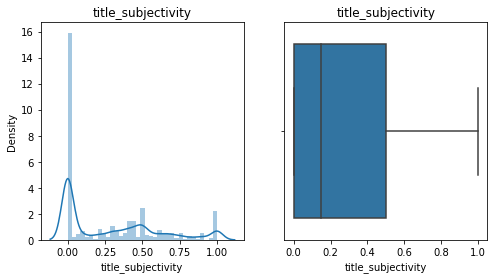

In [62]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This is a measure of how subjective (vs objective) a title's words are. We do not believe any data preparation is needed.

#### title_sentiment_polarity

Skewness: 0.396109


count    39644.000000
mean         0.071425
std          0.265450
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.150000
max          1.000000
Name: title_sentiment_polarity, dtype: float64

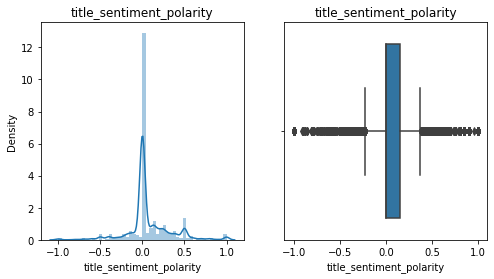

In [63]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This variable is an analysis of "public opinion" as calculated from extracted and weighted text of the title of the article. It is unimodal and gaussian.

#### abs_title_subjectivity

Skewness: -0.624149


count    39644.000000
mean         0.341843
std          0.188791
min          0.000000
25%          0.166667
50%          0.500000
75%          0.500000
max          0.500000
Name: abs_title_subjectivity, dtype: float64

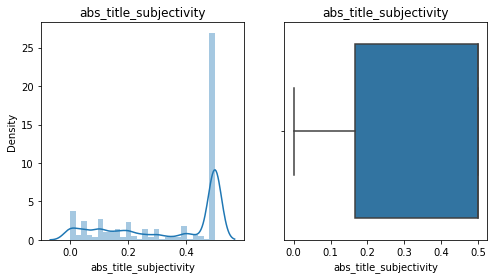

In [64]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This columns contains absolute subjectivity level and has values between 0 and 0.5 with most of the values around mean. We do not believe any data preparation is needed.

#### abs_title_sentiment_polarity

Skewness: 1.704193


count    39644.000000
mean         0.156064
std          0.226294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.250000
max          1.000000
Name: abs_title_sentiment_polarity, dtype: float64

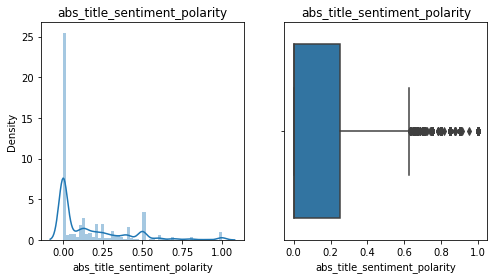

In [65]:
j= j+1
i= df.iloc[:,j]
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);#Histogram location
sns.distplot(i);
plt.title(df.columns[j]);
plt.subplot(1,2,2);#Boxplot location
sns.boxplot(i);
plt.title(df.columns[j]);
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

This columns gives us information about absolute polarity level, but there is a spike at 0 and it is right-skewed with values ranging from 0 to 1. We will standardize this value.

### Collinearity Analysis 




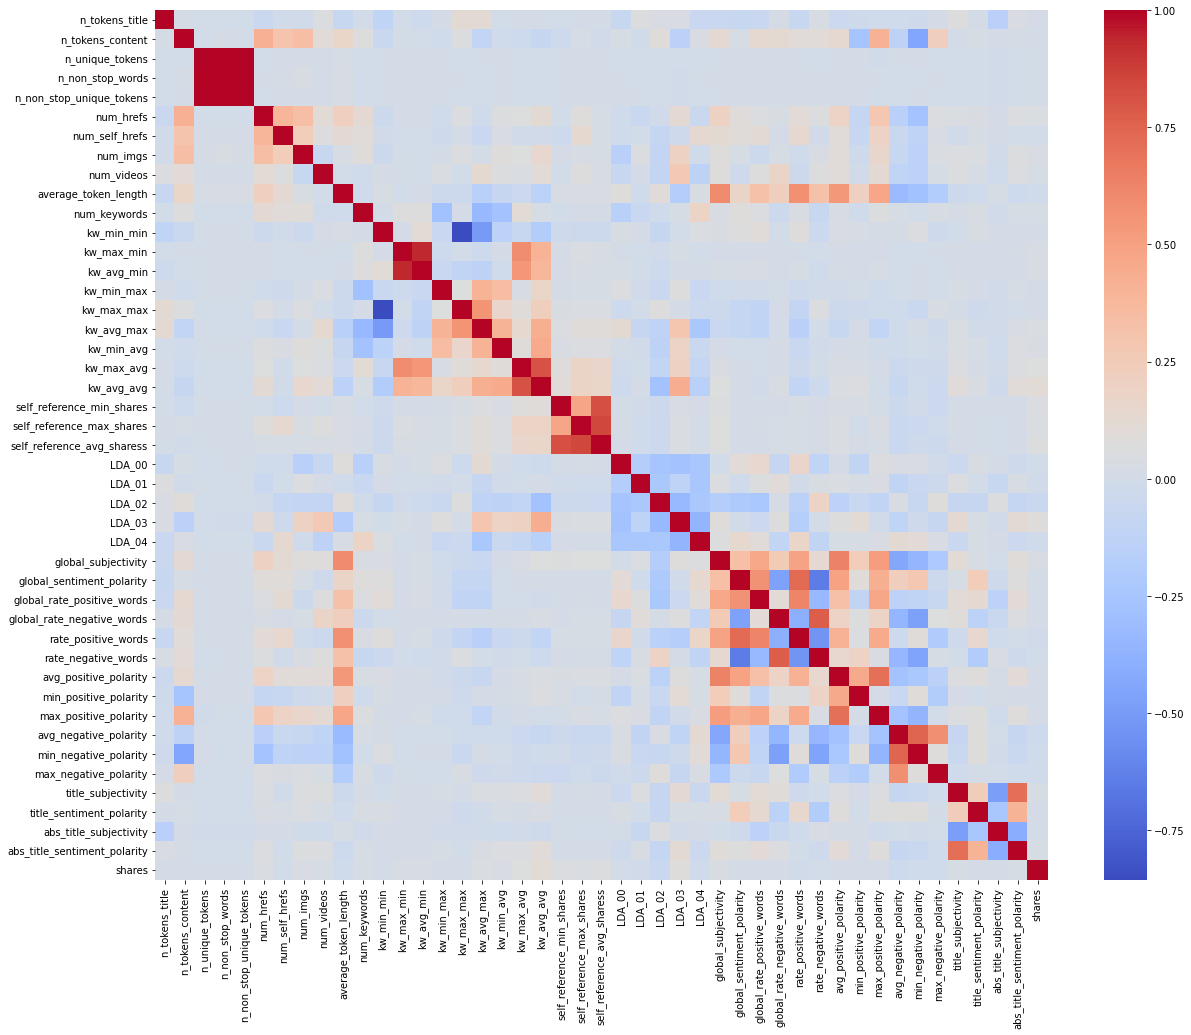

In [66]:
dfc1 = df.iloc[:,2:13]
dfc2 = df.iloc[:,19:31]
dfc3 = df.iloc[:,39:]
dfc = pd.concat([dfc1,dfc2,dfc3],axis=1)
plt.figure(figsize=(20,16))
sns.heatmap(dfc.corr(),cmap='coolwarm',annot=False);


Analysis: 

We see some correlations with the related sets of columns (ie keywords kw_max_max <-> kw_min_min, counts and averages of polarity). We will handle this collinearity later in our notebook by either dropping columns utilizing thresholds or combining features utilizing PCA or other dimensionality reduction techniques.

## Data Preparation

for our next steps we will drop some no predictive collumns,  standardize and normalize columns based on our findings above.

**dropping columns**
* url 
* time delta

**dropping a row**
* drop row 21037

**columns to be normalized and standardized:**

* n_tokens_content
* num_hrefs
* num_self_hrefs
* num_imgs
* kw_min_min
* kw_max_min
* kw_avg_min
* kw_min_max
* kw_max_max
* kw_min_avg
* kw_max_avg
* kw_avg_avg
* self_reference_min_shares
* self_reference_max_shares
* self_reference_avg_sharess
* abs_title_sentiment_polarity





In [67]:
# first we initialize a copy of our data frame to persevere the original 
data_clean = df.copy()

### Drop Rows & Columns


In [68]:
data_clean.drop(['timedelta', 'url'], axis = 1,inplace=True)#drop the columns
data_clean.drop(index=21037,inplace=True)#drop outlier row

### Normalizing & Scaling

the following columns will now be normalized
* n_tokens_content
* num_hrefs
* num_self_hrefs
* num_imgs
* num_videos
* kw_min_min
* kw_max_min
* kw_avg_min
* kw_min_max
* kw_max_max
* kw_min_avg
* kw_max_avg
* kw_avg_avg
* self_reference_min_shares
* self_reference_max_shares
* self_reference_avg_sharess
* abs_title_sentiment_polarity

In [69]:
columns = ['n_tokens_content','num_hrefs','num_self_hrefs','kw_min_min', 'kw_max_min', 'kw_avg_min','kw_min_max','kw_max_max',
                'kw_min_avg','kw_max_avg','kw_avg_avg','self_reference_min_shares','self_reference_max_shares',
                'self_reference_avg_sharess','num_imgs','num_videos','abs_title_sentiment_polarity']

for column in columns:#iterate over identified columns
  a = data_clean[[column]]
  data_clean[column] = pt(a,method='yeo-johnson')#we are performing a yeo-johnson transformation because most of the features have negative or 0 values

data_clean[columns].head()#sanity check

,n_tokens_content,num_hrefs,num_self_hrefs,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,num_imgs,num_videos,abs_title_sentiment_polarity
0,-0.720951,-0.693424,-0.149043,0.119319,-3.351863,-2.879302,-1.108269,-2.727207,-1.138613,-8.734794,-6.804915,-0.292271,-0.563863,-0.512839,-0.290053,-0.749617,0.714352
1,-0.582076,-0.957421,-0.740172,0.119319,-3.351863,-2.879302,-1.108269,-2.727207,-1.138613,-8.734794,-6.804915,-1.723826,-1.714057,-1.730852,-0.290053,-0.749617,-0.885534
2,-0.753694,-0.957421,-0.740172,0.119319,-3.351863,-2.879302,-1.108269,-2.727207,-1.138613,-8.734794,-6.804915,-0.035267,-0.359481,-0.284248,-0.290053,-0.749617,-0.885534
3,0.213264,0.153469,-1.767666,0.119319,-3.351863,-2.879302,-1.108269,-2.727207,-1.138613,-8.734794,-6.804915,-1.723826,-1.714057,-1.730852,-0.290053,-0.749617,-0.885534
4,1.214894,1.042531,2.522411,0.119319,-3.351863,-2.879302,-1.108269,-2.727207,-1.138613,-8.734794,-6.804915,-0.254888,0.971403,0.271912,1.660456,-0.749617,0.423562


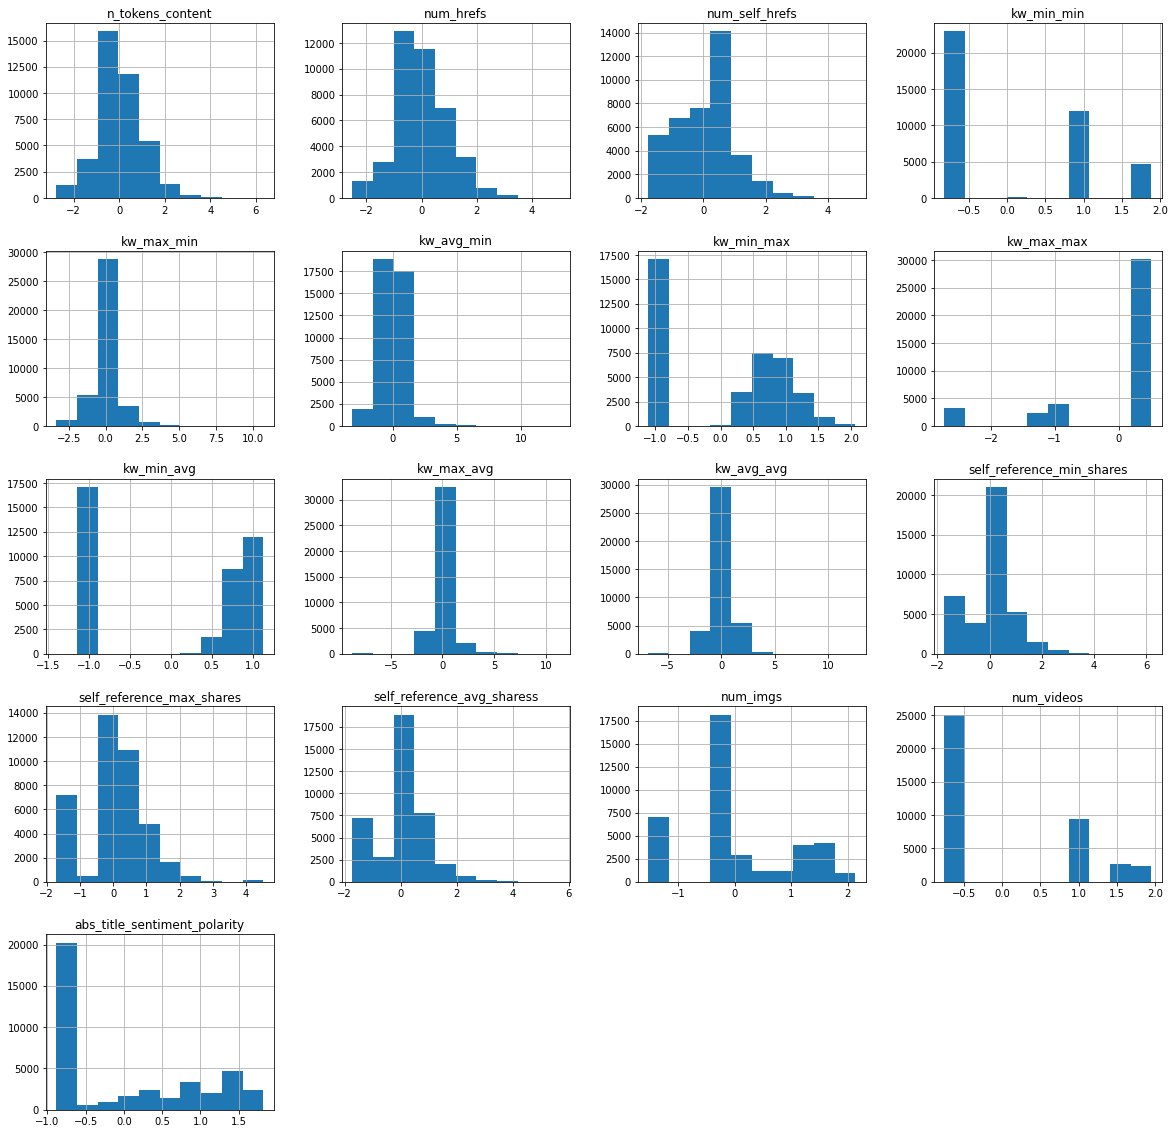

In [70]:
#create histograms for every transformed feature
data_clean[columns].hist(figsize = (20,20));

We will now compare these variables to the untransformed features, to see if we improved the distributions.

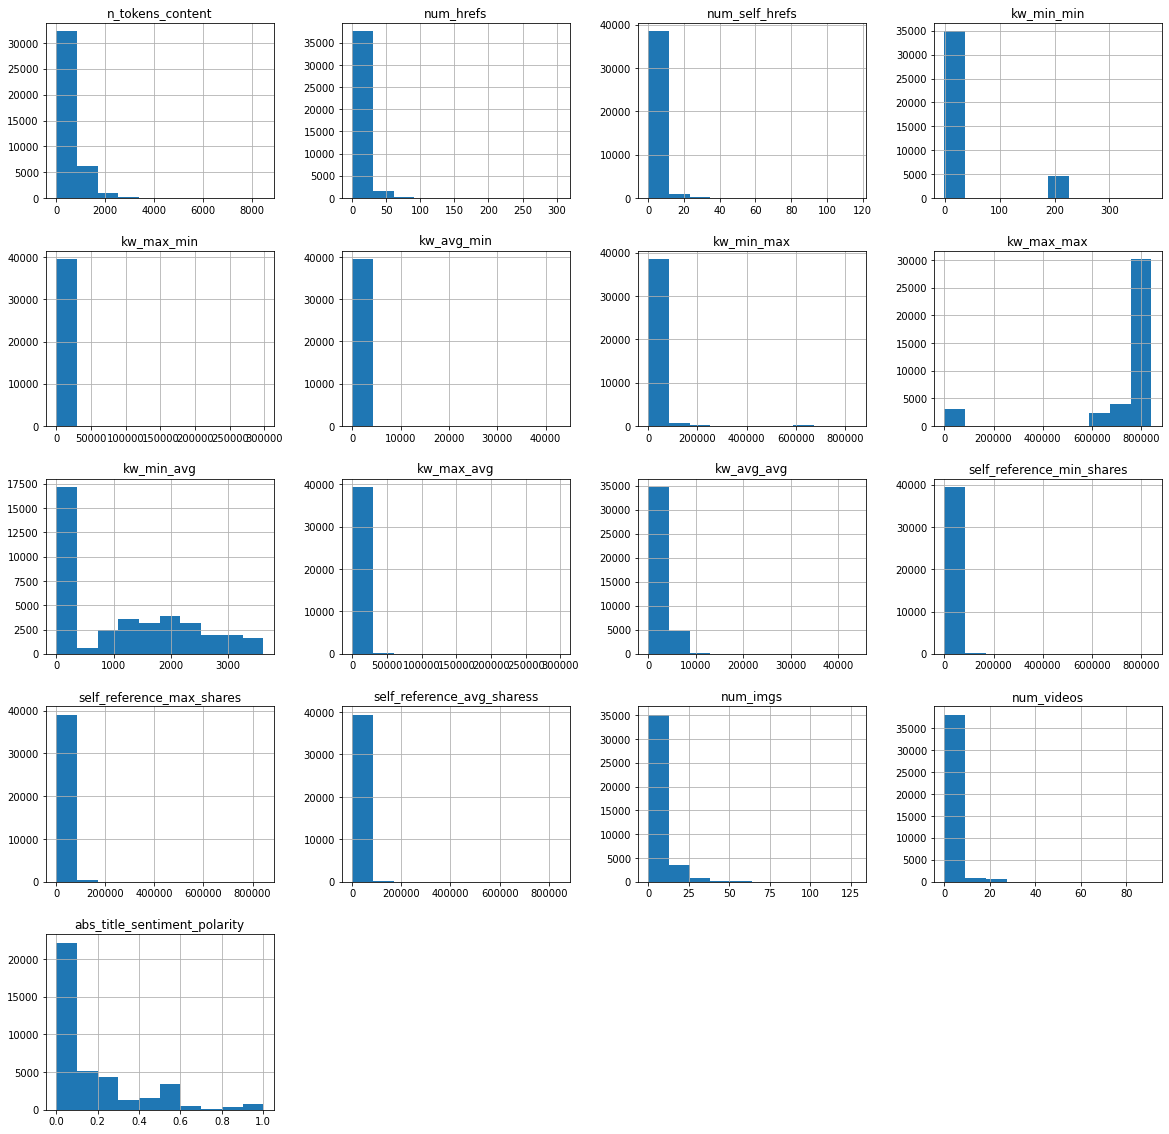

In [71]:
#create histograms for each original transformed feature
df[columns].hist(figsize = (20,20));

Though we believe our transformations are not perfect, they seem to a substantial improvement over the intitial dataset.

## Feature Selection & Dimensionality Reduction

Principle Component Analysis replaces the original correlated features with orthogonal (uncorrelated) data. We never apply PCA (or SVD to categorical data, only qualitative data.

We use PCA on large numercal feature sets, though it is computationaly expensive.

In [72]:
quantitative_columns = ['n_tokens_title',
                        'n_tokens_content',
                        'n_unique_tokens',
                        'n_non_stop_words',
                        'n_non_stop_unique_tokens',
                        'num_hrefs',
                        'num_self_hrefs',
                        'num_imgs',
                        'num_videos',
                        'average_token_length',
                        'num_keywords',
                        'kw_min_min', 
                        'kw_max_min', 
                        'kw_avg_min',
                        'kw_min_max',
                        'kw_max_max',
                        'kw_avg_max',
                        'kw_min_avg',
                        'kw_max_avg',
                        'kw_avg_avg',
                        'self_reference_min_shares',
                        'self_reference_max_shares',
                        'self_reference_avg_sharess',
                        'LDA_00',
                        'LDA_01',
                        'LDA_02',
                        'LDA_03',
                        'LDA_04',
                        'global_subjectivity',
                        'global_sentiment_polarity',
                        'global_rate_positive_words',
                        'global_rate_negative_words',
                        'rate_positive_words',
                        'rate_negative_words',
                        'avg_positive_polarity',
                        'min_positive_polarity',
                        'max_positive_polarity',
                        'avg_negative_polarity',
                        'min_negative_polarity',
                        'max_negative_polarity',
                        'title_subjectivity',
                        'title_sentiment_polarity',
                        'abs_title_subjectivity',
                        'abs_title_sentiment_polarity']

categorical_columns = ['data_channel_is_lifestyle',
                       'data_channel_is_entertainment',
                       'data_channel_is_bus',
                       'data_channel_is_socmed',
                       'data_channel_is_tech',
                       'data_channel_is_world',
                       'weekday_is_monday',
                       'weekday_is_tuesday',
                       'weekday_is_wednesday',
                       'weekday_is_thursday',
                       'weekday_is_friday',
                       'weekday_is_saturday',
                       'weekday_is_sunday',
                       'is_weekend']

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

### PCA on normalized variables
We will first Apply PCA ot our prepared data using the following steps  
1. Separate features and response variables 
   * Assignee only quantitate values to X 
   * Isolate shares column in y  
2. Split data to test and train groups 
3. Initialized PCA  model 
4. Train PCA model 
5. Visualize output 

In [73]:
#assign the explanatory variables to a Python object
X_clean = data_clean.drop(['shares'], axis = 1)[quantitative_columns].values
# assign the response variable to a Python object
y_clean = data_clean.shares.values

# 2. split the data into training + testing subsets
X_clean_train, X_clean_test, y_clean_train, y_clean_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# 3. create an instance of a PCA model +
# set the number of components was set inititaly to 44 number of varibles to support visualizations
pca = PCA(n_components=6)

# 4. apply the PCA function to the training data
pca_data =  pca.fit_transform(X_clean_train)

# display the explained variance ratio for the principal components we've derived from the data
print(pca.explained_variance_ratio_)

[9.99999999e-01 2.49551216e-10 2.25438494e-10 1.87910663e-10
 1.27557847e-10 9.91461859e-11]


#### Scree Plot
5. We will visualize our PCA 

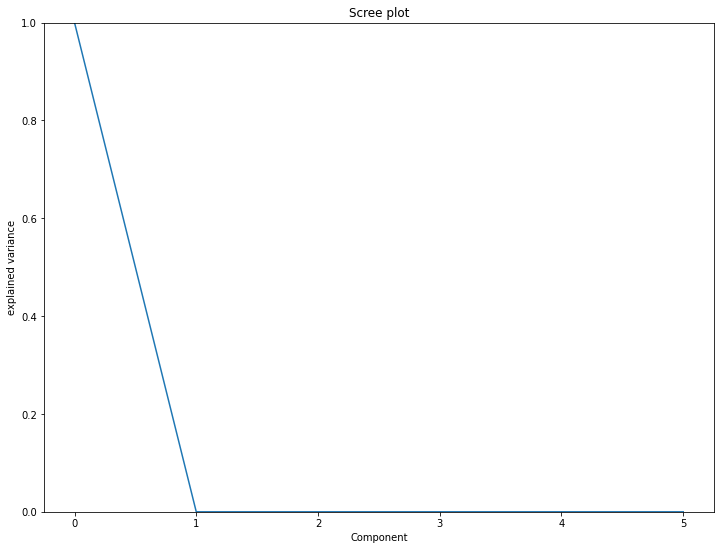

In [74]:
f, ax = plt.subplots(figsize=(12,9));
ax.plot(pca.explained_variance_ratio_)
ax.set(
    xlabel = "Component",
    ylabel = "explained variance",
    title = "Scree plot",
    ylim = (0,1)
);

It seems our first principle component explaines 99% of the variance in the quantitative features.

#### PCA Heatmap 

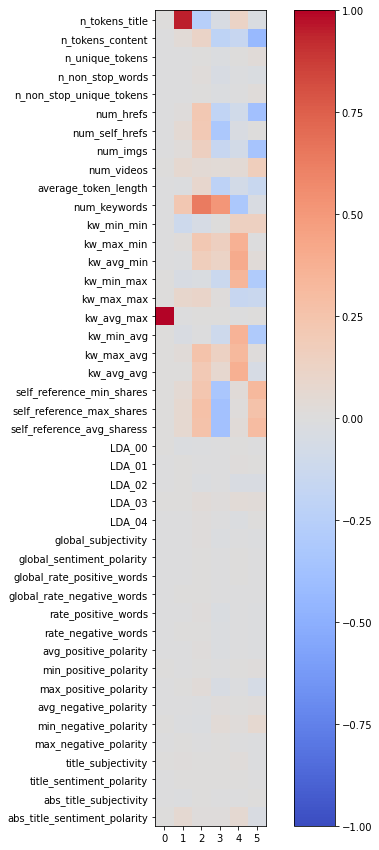

In [75]:
plt.figure(figsize=(10,15))
plt.imshow(
    pca.components_.T,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    )
plt.xlabel="Priciple Component"
plt.ylabel="Contribution"
plt.title="Contribution of Features to Components"
plt.yticks(range(44),('n_tokens_title',
                        'n_tokens_content',
                        'n_unique_tokens',
                        'n_non_stop_words',
                        'n_non_stop_unique_tokens',
                        'num_hrefs',
                        'num_self_hrefs',
                        'num_imgs',
                        'num_videos',
                        'average_token_length',
                        'num_keywords',
                        'kw_min_min', 
                        'kw_max_min', 
                        'kw_avg_min',
                        'kw_min_max',
                        'kw_max_max',
                        'kw_avg_max',
                        'kw_min_avg',
                        'kw_max_avg',
                        'kw_avg_avg',
                        'self_reference_min_shares',
                        'self_reference_max_shares',
                        'self_reference_avg_sharess',
                        'LDA_00',
                        'LDA_01',
                        'LDA_02',
                        'LDA_03',
                        'LDA_04',
                        'global_subjectivity',
                        'global_sentiment_polarity',
                        'global_rate_positive_words',
                        'global_rate_negative_words',
                        'rate_positive_words',
                        'rate_negative_words',
                        'avg_positive_polarity',
                        'min_positive_polarity',
                        'max_positive_polarity',
                        'avg_negative_polarity',
                        'min_negative_polarity',
                        'max_negative_polarity',
                        'title_subjectivity',
                        'title_sentiment_polarity',
                        'abs_title_subjectivity',
                        'abs_title_sentiment_polarity'));
plt.xticks(range(6),range(0,6));
plt.colorbar();

Analysis:  

The first component of our PCA (PCA1)  Explains nearly 100% of the variance of in the data. This is a good but unexpected outcome. It seems off that kw_avg_max is the primary contributor to this component, but we have to trust the math here. To better understand and help validate this outcome we will run our PCA again on the unprepped columns.

### PCA Original, Uncleaned Data

In [76]:
# assign the explanatory variables to a Python object this time non-cleaned
X_unclean = df.drop(['shares'], axis = 1)[quantitative_columns].values
# assign the response variable to a Python object
y_unclean = df.shares.values

# split the data into training + testing subsets
X_unclean_train, X_unclean_test, y_unclean_train, y_unclean_test = train_test_split(X_unclean, y_unclean, test_size=0.2, random_state=42)

# create an instance of a PCA model +
# set the number of components was set inititaly to 44 number of varibles to support visualizations
pca_unc = PCA(n_components=6)

# apply the PCA function to the training data
pca_unc.fit(X_unclean_train)

# display the explained variance ratio for the principal components we've derived from the data
print(pca_unc.explained_variance_ratio_)

[7.62269460e-01 1.64507868e-01 3.52304797e-02 3.22909598e-02
 4.54837736e-03 6.89273702e-04]


#### Scree Plot

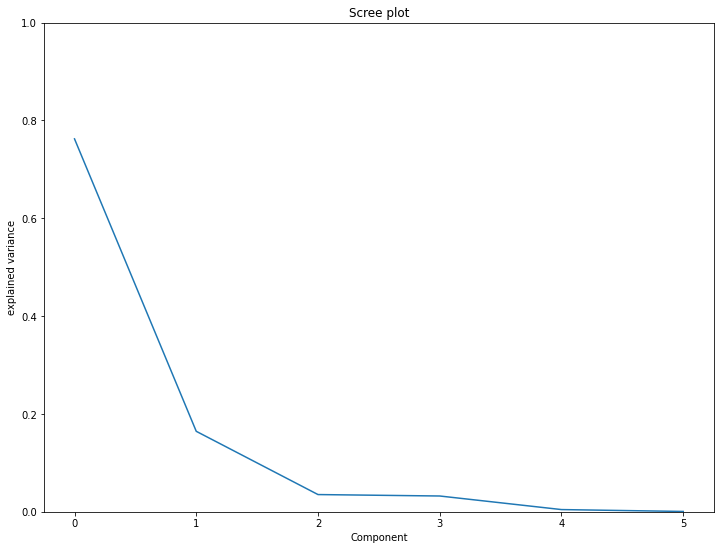

In [77]:
f, ax = plt.subplots(figsize=(12,9));
ax.plot(pca_unc.explained_variance_ratio_)
ax.set(
    xlabel = "Component",
    ylabel = "explained variance",
    title = "Scree plot",
    ylim = (0,1)
);

Running PCA on our uncleaned data reveals a different outcome. Now the first principle component (PCA1) explains ~76% of the variance in the data and the second explains ~16% and the third ~3.5%. So 3 components gets us 95.5%. This is still less then the 1st component of our data that has been prepared via standardization and normalization. 

#### PCA Heatmap

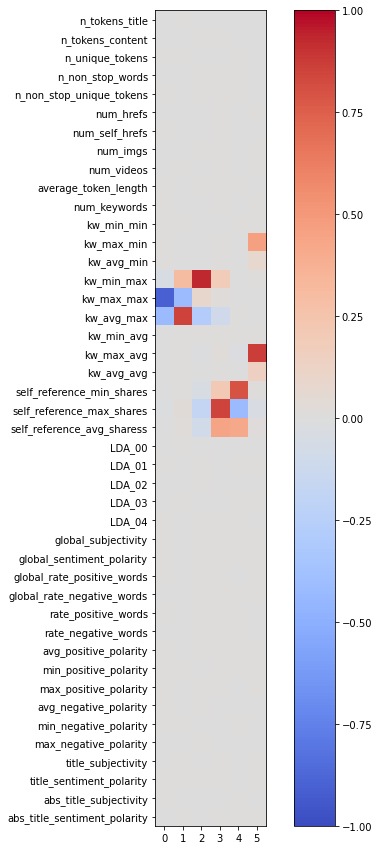

In [78]:
plt.figure(figsize=(10,15))
plt.imshow(
    pca_unc.components_.T,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    )
plt.xlabel="Priciple Component"
plt.ylabel="Contribution"
plt.title="Contribution of Features to Components"
plt.yticks(range(44),('n_tokens_title',
                        'n_tokens_content',
                        'n_unique_tokens',
                        'n_non_stop_words',
                        'n_non_stop_unique_tokens',
                        'num_hrefs',
                        'num_self_hrefs',
                        'num_imgs',
                        'num_videos',
                        'average_token_length',
                        'num_keywords',
                        'kw_min_min', 
                        'kw_max_min', 
                        'kw_avg_min',
                        'kw_min_max',
                        'kw_max_max',
                        'kw_avg_max',
                        'kw_min_avg',
                        'kw_max_avg',
                        'kw_avg_avg',
                        'self_reference_min_shares',
                        'self_reference_max_shares',
                        'self_reference_avg_sharess',
                        'LDA_00',
                        'LDA_01',
                        'LDA_02',
                        'LDA_03',
                        'LDA_04',
                        'global_subjectivity',
                        'global_sentiment_polarity',
                        'global_rate_positive_words',
                        'global_rate_negative_words',
                        'rate_positive_words',
                        'rate_negative_words',
                        'avg_positive_polarity',
                        'min_positive_polarity',
                        'max_positive_polarity',
                        'avg_negative_polarity',
                        'min_negative_polarity',
                        'max_negative_polarity',
                        'title_subjectivity',
                        'title_sentiment_polarity',
                        'abs_title_subjectivity',
                        'abs_title_sentiment_polarity'));
plt.xticks(range(6),range(0,6));
plt.colorbar();

This also does not clarify our principle components.

### Building a new data frame with PCA values

We will now build a new dataframe with our PCA component and categorical values.

**Process**:
1. Split categorical data 
   * using the same seed split should be consistent to previous split 
2. Transform our testing numerical data using the already substantiated PCA model 
3. Add PCA columns to datframes 
4. Training
5. Testing

In [79]:
#test train split of categorical data 
X_cats_train, X_cats_test = train_test_split(data_clean[categorical_columns], test_size=0.2, random_state=42)
#sanity check
X_cats_train.shape

(31714, 14)

In [80]:
# adding our PCA1 to our training and testing data of Categorical values 
X_cats_train['PCA1'] = pca_data[:,0] #only PCA1 is selected because it explained 999.999999....% of variance

X_cats_test['PCA1'] = pca.transform(X_clean_test)[:,0] #testing data is transformed using PCA model built on training data and same pca1 column is selected

#sanity check
X_cats_train.head()

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,PCA1
22141,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-15464.831468
904,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-233773.117200
23685,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-95729.117196
22966,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,80820.882794
4705,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-86679.117209


## Basic linear model for baseline 

We will build a simple linear model on the full set of our data to utlize as a baseline


In [81]:
# split data

data_test_x = df.copy()
# droping a single categorical to baseline the model 
data_test_x.drop(['timedelta', 'url','shares','weekday_is_saturday','data_channel_is_socmed'], axis = 1,inplace=True)

# drop outlier row
data_test_x.drop(index=21037,inplace=True)

data_test_y = df.shares.copy()
data_test_y.drop(index=21037,inplace=True)
X_train, X_test, y_train, y_test  = train_test_split(data_test_x,data_test_y, test_size=0.2, random_state=42)


# we will use stats models for its pretty output and also sklearn for direct comparision later
import statsmodels.api as sm
lin_model = sm.OLS(y_train, X_train)
results = lin_model.fit()
print(results.summary())


# sk learn version initialize a model 
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
print('\n sklearn:')
print(lin_model.score(X_test,y_test))
print(lin_model.coef_)


                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     12.91
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          3.56e-111
Time:                        03:32:34   Log-Likelihood:            -3.4180e+05
No. Observations:               31714   AIC:                         6.837e+05
Df Residuals:                   31659   BIC:                         6.842e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
n_tokens_title

Analysis:

The wide variance of R<sup>2</sup> values is very surpising.   
statsmodels ols = 0.022  
sklearn linear regression = -1.5501687086018348

We will utlize the sklearn going forward because of its inbuilt feature selection algorthim RFECV. This should help with stats models output about multicollinearity. 

## Feature selection and model building

In the next section we will try to recursivly remove features while training our regresion model to find the ideal fit.

We will utlize sklearns RFECV to acomplish this.

We will start with our dimensionaly reduced data.


**procedure**
1. Assign variables to x,y for simplicity 
2. Substaniate a model
3. Fit model
4. Utlize RFECV to optimize model. 

### Building model on dimensionly reduced data

In [82]:
#buidling model and recersivlye selecting features

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

#1. for simplicity we will assigned our data to x ,y
X = X_cats_train.values
y = y_clean_train
 
estimator_compare = LinearRegression()
estimator = LinearRegression()
selector = RFECV(estimator, step=1, cv=5,verbose=1)
#This is to select 5 variables: can be changed and checked in model for accuracy
# code from:
# https://www.datasklr.com/ols-least-squares-regression/variable-selection

estimator_compare.fit(X,y)
myvalues = selector.fit(X,y) #to fit

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting 

In [83]:

myvalues.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

print("RFECV:")
rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
print(rankings)
print(myvalues.score(X_cats_test,y_test))

print("\nbasic model:")
estimator_compare.score(X_cats_test,y_test)


RFECV:
    0
0   1
1   1
2   1
3   1
4   1
5   1
6   1
7   1
8   1
9   1
10  1
11  1
12  1
13  1
14  2
0.007271812816248002

basic model:


0.008050305375884248

Analysis:  
Using our normalized, standardized and dimensionally reduced dataset generates a linear regression model with an R<sup>2</sup> of **0.008**   
RFECV returns similar but worse performing model at **0.0072** this was done by filtering out the PCA feature during RFECV.



### using RFECV on original data

In [84]:
# we will run RFECV on our basline data
# we will utlize data split in basline model above 
#1. for simplicity we will assigned our data to x ,y
X = X_train
y = y_train

estimator_compare = LinearRegression()
estimator = LinearRegression()
selector = RFECV(estimator, step=1, cv=5,verbose=1)
#This is to select 5 variables: can be changed and checked in model for accuracy
# code reference:
# https://www.datasklr.com/ols-least-squares-regression/variable-selection

estimator_compare.fit(X,y)
myvalues = selector.fit(X,y) #to fit

Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 fe

In [85]:
print("RFECV:")
rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
print(rankings)
print(myvalues.score(X_test,y_test))

RFECV:
    0
0   1
1   1
2   1
3   1
4   1
5   1
6   1
7   1
8   1
9   1
10  1
11  1
12  1
13  1
14  1
15  1
16  1
17  1
18  1
19  4
20  5
21  6
22  1
23  1
24  1
25  1
26  3
27  2
28  1
29  1
30  1
31  1
32  1
33  1
34  1
35  1
36  1
37  1
38  1
39  1
40  1
41  1
42  1
43  1
44  1
45  1
46  1
47  1
48  1
49  1
50  1
51  1
52  1
53  1
54  1
55  1
-1.321110710105596


Analysis:  
Running on the baseline data improves the model slightly but it still is significantly worse than against our prepared data.

### RFECVF and linear model on no reduced data

we will finally build models on normalized, standarized none reduced data and see how well they do compared to the baseline and PCA models.

In [86]:
# we will run RFECV on our basline data
# we will utlize data split in basline model above 


#1. for simplicity we will assigned our data to x,x_test, and y
X = np.concatenate((X_clean_train,X_cats_train.drop(columns='PCA1').values),axis=1)
x_test = np.concatenate((X_clean_test,X_cats_test.drop(columns='PCA1').values),axis=1)
y = y_train


#2. we initialize a model, RFECV and fit them 
estimator_compare = LinearRegression()
estimator = LinearRegression()
selector = RFECV(estimator, step=1, cv=5,verbose=1)
#This is to select 5 variables: can be changed and checked in model for accuracy
# code reference:
# https://www.datasklr.com/ols-least-squares-regression/variable-selection

estimator_compare.fit(X,y)
myvalues = selector.fit(X,y) #to fit### Correlation threshhold

Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 fe

In [87]:
print("RFECV:")
rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
print(rankings)
print(myvalues.score(x_test,y_test))

print("baseline model")
print(estimator_compare.score(x_test,y_test))

RFECV:
    0
0   1
1   1
2   1
3   1
4   1
5   1
6   1
7   1
8   1
9   1
10  1
11  1
12  1
13  1
14  1
15  1
16  2
17  1
18  1
19  1
20  1
21  1
22  1
23  1
24  1
25  1
26  1
27  1
28  1
29  1
30  1
31  1
32  1
33  1
34  1
35  1
36  1
37  1
38  1
39  1
40  1
41  1
42  1
43  1
44  1
45  1
46  1
47  1
48  1
49  1
50  1
51  1
52  1
53  1
54  1
55  1
56  1
57  1
-3.3050598398555772e+16
baseline model
-18.042466239474184


Analysis:

The baseline and feature selected models done utilizing our normalized and reduced data underperform both the baseline data and the dimensionally reduced data.

### Correlation Analysis

In [88]:
#identify highly correlated features
#source: https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
cor_matrix = X_cats_train.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]
print(); print(to_drop)


['is_weekend']


Is_weekend is the only feature correlated above 60% among our remaining variables. Let's now check for multicolliearity

### Multi-collinearity

In [89]:
#source https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
X = X_cats_train
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                          Feature       VIF
0       data_channel_is_lifestyle  1.373476
1   data_channel_is_entertainment  1.893295
2             data_channel_is_bus  1.724820
3          data_channel_is_socmed  1.363098
4            data_channel_is_tech  2.002812
5           data_channel_is_world  2.051060
6               weekday_is_monday  2.076588
7              weekday_is_tuesday  2.154204
8            weekday_is_wednesday  2.170498
9             weekday_is_thursday  2.130303
10              weekday_is_friday  1.852205
11            weekday_is_saturday       inf
12              weekday_is_sunday       inf
13                     is_weekend       inf
14                           PCA1  1.195200


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


If there is perfect correlation, then VIF = infinity. We should remove is_weekend and re-check.

## Conclusion
None of our models performed particularly well.

The baseline and feature selected models performed utilizing our normalized and standardized data underperform both the baseline data and the dimensionally reduced data.
We not sure if we actually improved the model.